In [ ]:
#@title Install required libraries

%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install --upgrade pandas
%pip install --upgrade statsmodels

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Load the dataset (available in CSV format)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Define column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(url, names=columns)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target variable (y)
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target (0 = No diabetes, 1 = Diabetes)

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Explicitly setting solver to avoid warning
model = LogisticRegression(solver='lbfgs')  # or 'liblinear', 'saga', etc.

# Now you can fit the model without warnings
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
# Generate values from -10 to 10
z = np.linspace(-10, 10, 100)
y = sigmoid(z)

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.75
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



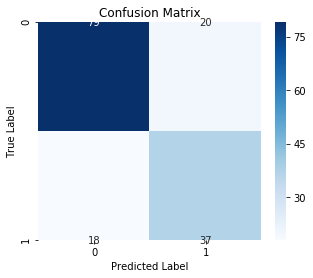

In [10]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

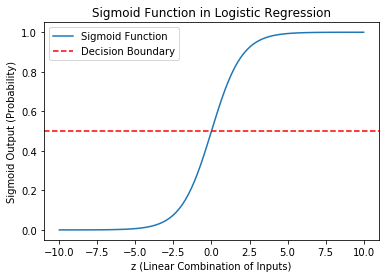

In [15]:
# Plot the sigmoid curve
plt.plot(z, y, label="Sigmoid Function")
plt.axhline(y=0.5, color="r", linestyle="--", label="Decision Boundary")  # Threshold at 0.5
plt.xlabel("z (Linear Combination of Inputs)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Function in Logistic Regression")
plt.legend()
plt.show()